In [1]:
pwd


'/Users/kiranchinthapalli/Data Science/ultimate_challenge'

Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 
Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time seriesof login counts in ways that best characterize the underlying patterns of the demand. 
Please report/illustrate important features of the demand, such as daily cycles. 
If there are data quality issues, please report them.

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
#df_logins = pd.read_json("logins.json")
df_logins = pd.read_json("logins.json")
df_logins["count"] = 1
df_logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [4]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [5]:
df_logins.describe()

,count
count,93142.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [6]:
#Aggregate these login counts based on 15 minute time intervals
df_logins_count = df_logins.groupby(pd.Grouper(key='login_time', freq='900s')).count()
df_logins_count['day_of_week'] = (pd.DatetimeIndex(df_logins_count.index).dayofweek)
df_logins_count['hour'] = (pd.DatetimeIndex(df_logins_count.index).hour)
df_logins_count.head()

,count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,2,3,20
1970-01-01 20:15:00,6,3,20
1970-01-01 20:30:00,9,3,20
1970-01-01 20:45:00,7,3,20
1970-01-01 21:00:00,1,3,21


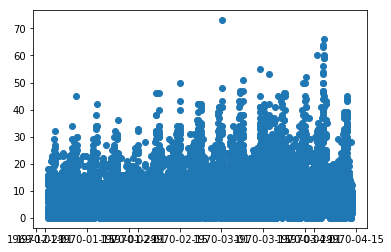

In [7]:
from matplotlib.dates import date2num
plt.plot_date(date2num(list(df_logins_count.index)), df_logins_count["count"].values)

In [8]:

df_logins = df_logins.groupby(pd.Grouper(key='login_time', freq='900s')).count()
df_logins['day_of_week'] = (pd.DatetimeIndex(df_logins.index).dayofweek)
df_logins['hour'] = (pd.DatetimeIndex(df_logins.index).hour)
df_logins.head()
#dt.day_name()
#df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.weekday_name

,count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,2,3,20
1970-01-01 20:15:00,6,3,20
1970-01-01 20:30:00,9,3,20
1970-01-01 20:45:00,7,3,20
1970-01-01 21:00:00,1,3,21


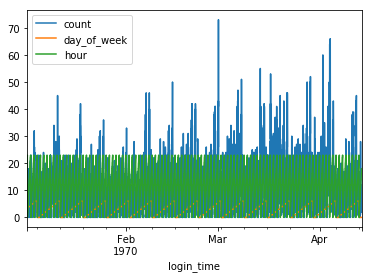

In [9]:
df_logins.resample('15T').sum().plot()
plt.show()

In [10]:
df_logins_count["day_of_week"][df_logins_count["count"] > 30].value_counts()

5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: day_of_week, dtype: int64

In [11]:
df_logins_count["day_of_week"][df_logins_count["count"] > 20].value_counts()

5    310
6    258
4    169
3     92
2     64
1     56
0     30
Name: day_of_week, dtype: int64

Weekends are high

In [ ]:

decomposition = sm.tsa.seasonal_decompose(df_logins.resample('12H').sum())
decomposition.plot()
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df_logins.resample('24H').sum())
decomposition.plot()
plt.show()